In [ ]:
%load_ext autoreload
%autoreload 2

In [71]:
# Importing the important things:

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import pymc3 as pm
import corner
import requests
from astropy.io import fits

from NamastePymc3 import *

tic=63898957
sector='all'
#Downloading TESS lc
epoch={1:'2018206045859_0120',2:'2018234235059_0121',3:'2018263035959_0123',4:'2018292075959_0124',
       5:'2018319095959_0125',6:'2018349182459_0126',7:'2019006130736_0131',8:'2019032160000_0136',
       9:'2019058134432_0139',10:'2019085135100_0140',11:'2019112060037_0143',12:'2019140104343_0144',
       13:'2019169103026_0146'}
lcs=[]
if type(sector)==str and sector=='all':
    epochs=list(epoch.keys())
else:
    epochs=[sector]
    #observed_sectors=observed(tic)
    #observed_sectors=np.array([os for os in observed_sectors if observed_sectors[os]])
    #if observed_sectors!=[-1] and len(observed_sectors)>0:
    #    observed_sectors=observed_sectors[np.in1d(observed_sectors,np.array(list(epoch.keys())))]
    #else:
    #    observed_sectors=sector
    #print(observed_sectors)
for key in epochs:
    fitsloc="https://archive.stsci.edu/missions/tess/tid/s"+str(key).zfill(4)+"/"+str(tic).zfill(16)[:4]+"/"+str(tic).zfill(16)[4:8]+"/"+str(tic).zfill(16)[-8:-4]+"/"+str(tic).zfill(16)[-4:]+"/tess"+epoch[key].split('_')[0]+"-s"+str(key).zfill(4)+"-"+str(tic).zfill(16)+"-"+epoch[key].split('_')[1]+"-s_lc.fits"
    if requests.get(fitsloc, timeout=600).status_code==200:
        print(fitsloc)
        with fits.open(fitsloc) as hdus:
            lcs+=[openFits(hdus,fitsloc)]
            x+=[ix]
            y+=[iy]
            yerr+=[iyerr]
            '''
            with fits.open(fitsloc, mode="readonly") as hdulist:
            time = hdulist[1].data['TIME']
            sap = hdulist[1].data['SAP_FLUX']/np.nanmedian(hdulist[1].data['SAP_FLUX'])
            pdcsap = hdulist[1].data['PDCSAP_FLUX']/np.nanmedian(hdulist[1].data['PDCSAP_FLUX'])
            bg = hdulist[1].data['SAP_BKG']/np.nanmedian(hdulist[1].data['SAP_BKG'])
            bg_err = hdulist[1].data['SAP_BKG_ERR']/np.nanmedian(hdulist[1].data['SAP_BKG'])
            if np.nansum(hdulist[1].data['PSF_CENTR2'])==0.0:
                cent = np.sqrt((hdulist[1].data['MOM_CENTR1']-np.nanmedian(hdulist[1].data['MOM_CENTR1']))**2+
                               (hdulist[1].data['MOM_CENTR2']-np.nanmedian(hdulist[1].data['MOM_CENTR2']))**2)
            else:
                cent = np.sqrt((hdulist[1].data['PSF_CENTR1']-np.nanmedian(hdulist[1].data['PSF_CENTR1']))**2+
                               (hdulist[1].data['PSF_CENTR2']-np.nanmedian(hdulist[1].data['PSF_CENTR2']))**2)

        sectlcs+=[np.column_stack((time,pdcsap,sap,bg,cent))]
        print(fitsloc)
        '''
lc=lcStack(lcs)


DEBUG [matplotlib.pyplot.switch_backend()]: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): archive.stsci.edu:443
DEBUG [urllib3.connectionpool._make_request()]: https://archive.stsci.edu:443 "GET /missions/tess/tid/s0001/0000/0000/6389/8957/tess2018206045859-s0001-0000000063898957-0120-s_lc.fits HTTP/1.1" 404 297
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): archive.stsci.edu:443
DEBUG [urllib3.connectionpool._make_request()]: https://archive.stsci.edu:443 "GET /missions/tess/tid/s0002/0000/0000/6389/8957/tess2018234235059-s0002-0000000063898957-0121-s_lc.fits HTTP/1.1" 404 297
DEBUG [urllib3.connectionpool._new_conn()]: Starting new HTTPS connection (1): archive.stsci.edu:443
DEBUG [urllib3.connectionpool._make_request()]: https://archive.stsci.edu:443 "GET /missions/tess/tid/s0003/0000/0000/6389/8957/tess2018263035959-s0003-0000000063898957-0123-s_l

ValueError: non-broadcastable output operand with shape (13423,) doesn't match the broadcast shape (1,13423)

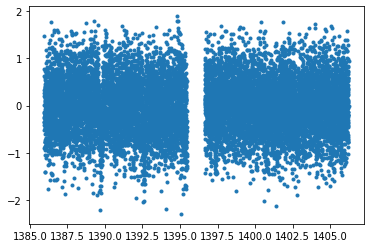

In [39]:
plt.plot(x,y,'.')

In [46]:
vand=openVand(203311200,2)

Vanderburg LC at  http://archive.stsci.edu/missions/hlsp/k2sff/c02/203300000/11200/hlsp_k2sff_k2_lightcurve_203311200-c02_kepler_v1_llc.fits


In [47]:
f=fits.open("http://archive.stsci.edu/missions/hlsp/k2sff/c02/203300000/11200/hlsp_k2sff_k2_lightcurve_203311200-c02_kepler_v1_llc.fits")

In [62]:
import everest
st=everest.Everest(203311200,season=2)

INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 203311200.


In [68]:
fitsloc

'https://archive.stsci.edu/missions/tess/tid/s0013/0000/0000/6389/8957/tess2019169103026-s0013-0000000063898957-0146-s_lc.fits'

In [74]:
t=np.arange(0,27,0.1)
t=np.hstack((t[:30],t[40:100],t[140:200],t[208:]))

In [78]:
t0=1.5
dur=0.4

In [99]:
t=np.arange(0,27,0.1)
def PeriodGaps(t0,t,dur=0.5):
    # Given the time array, the t0 of transit, and the fact that another transit is not observed, 
    #   we want to calculate a distribution of impossible periods to remove from the Period PDF post-MCMC
    # In this case, a list of periods is returned, with all points within 0.5dur to be cut
    dist_from_t0=np.sort(abs(t0-t))
    gaps=np.where(np.diff(dist_from_t0)>(0.9*dur))[0]
    listgaps=[]
    for ng in range(len(gaps)):
        start,end=dist_from_t0[gaps[ng]],dist_from_t0[gaps[ng]+1]
        listgaps+=[np.linspace(start,end,np.ceil(2*(end-start)/dur))]
    listgaps+=[np.max(dist_from_t0)]
    return np.hstack(listgaps)

In [102]:
[PeriodGaps(t,t0,dur)]+[PeriodGaps(t,20,dur)]

[array([25.4]), array([20.])]

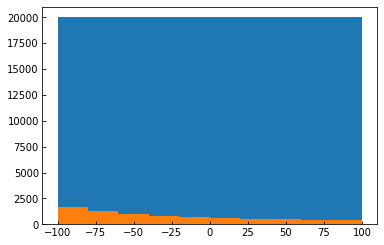

In [201]:
_=plt.hist(np.arange(-100,100,0.001))
n=150
_=plt.histnp.exp(np.linspace(np.log(n+-100),np.log(n+100),8000))-n)(

In [213]:
min_bound=-50
max_bound=10

high_num_fact=(np.max([abs(min_bound),max_bound])+0.33*(max_bound-min_bound))

_=plt.hist(np.exp(np.linspace(np.log(high_num_fact+min_bound),np.log(high_num_fact+max_bound),8000))-high_num_fact)

In [214]:
pm.Bound?

In [205]:
high_num_fact

65.0

In [109]:
import celerite

(0, 5)

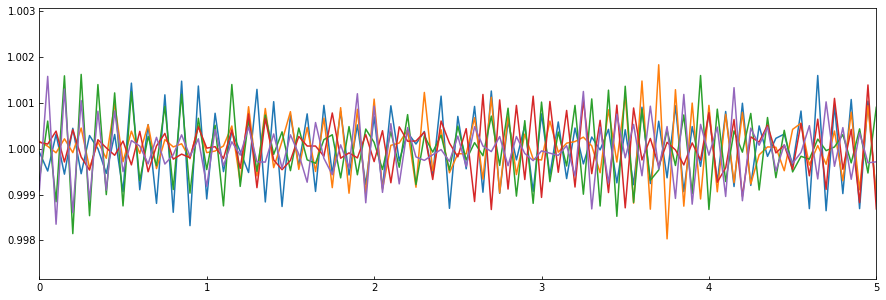

In [223]:
plt.figure(figsize=(15,5))
per=0.1/(np.pi*2)
power=0.01
logS0=np.log(power)-4*np.log(1/per)
Q=1000
kernel = celerite.terms.SHOTerm(log_S0=logS0, log_omega0=np.log(1/per), log_Q=np.log10(Q))
gp = celerite.GP(kernel, mean=1.0)
gp.compute(np.arange(0,20,0.05), np.tile(1e-8,20*20))
for n in range(5):
    plt.plot(np.arange(0,20,0.05),gp.sample())
plt.xlim(0,5)

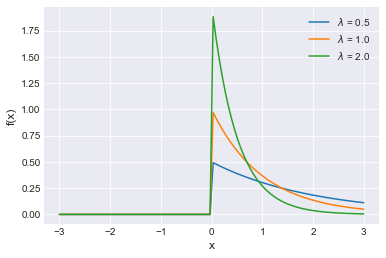

In [226]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
plt.style.use('seaborn-darkgrid')
x = np.linspace(-3, 3, 100)
for lam in [0.5, 1., 2.]:
    pdf = st.expon.pdf(x, scale=1.0/lam)
    plt.plot(x, pdf, label=r'$\lambda$ = {}'.format(lam))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)


In [227]:
pm.Exponential?

DEBUG [matplotlib.ticker.tick_values()]: vmin 6.309573444801929e-05 vmax 1.5848931924611136
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02])
DEBUG [matplotlib.ticker.tick_values()]: vmin 6.309573444801929e-05 vmax 1.5848931924611136
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02])
DEBUG [matplotlib.ticker.tick_values()]: vmin 6.309573444801929e-05 vmax 1.5848931924611136
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([2.e-06, 3.e-06, 4.e-06, 5.e-06, 6.e-06, 7.e-06, 8.e-06, 9.e-06,
       2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05, 9.e-05,
       2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04,
       2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01

DEBUG [matplotlib.ticker.tick_values()]: vmin 0.00027537826206635777 vmax 16.46991021905477
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.00027537826206635777 vmax 16.46991021905477
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.00027537826206635777 vmax 16.46991021905477
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05, 9.e-05,
       2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04,
       2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00

DEBUG [matplotlib.ticker.tick_values()]: vmin 0.00027537826206635777 vmax 16.46991021905477
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.00027537826206635777 vmax 16.46991021905477
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.00027537826206635777 vmax 16.46991021905477
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05, 9.e-05,
       2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04,
       2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00

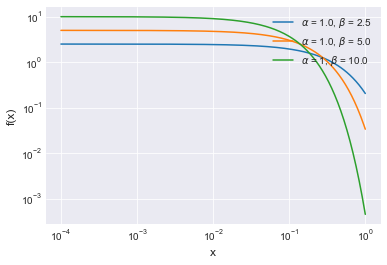

In [299]:
import numpy as np
import scipy.stats as st
plt.style.use('seaborn-darkgrid')
#x = np.linspace(0, 20, 200)
x = np.logspace(-4, 0.0, 200)
alphas = [1., 2., 3., 7.5]
betas = [.5, .5, 1., 1.]

a=1.0; b=2.50
pdf = st.gamma.pdf(x, a, scale=1.0/b)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))

a=1.0; b=5.0
pdf = st.gamma.pdf(x, a, scale=1.0/b)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
a=1; b=10.0
pdf = st.gamma.pdf(x, a, scale=1.0/b)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))


plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.xscale('log')
plt.yscale('log')

(1e-15, 1)

DEBUG [matplotlib.ticker.tick_values()]: vmin 0.00630957344480193 vmax 158.48931924611142
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.00630957344480193 vmax 158.48931924611142
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.00630957344480193 vmax 158.48931924611142
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04,
       2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+

DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.00630957344480193 vmax 158.48931924611142
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.00630957344480193 vmax 158.48931924611142
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04, 9.e-04,
       2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,

DEBUG [matplotlib.ticker.tick_values()]: vmin 1e-15 vmax 1.0
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03,
       1.e-01, 1.e+01, 1.e+03])
DEBUG [matplotlib.ticker.tick_values()]: vmin 1e-15 vmax 1.0
DEBUG [matplotlib.ticker.tick_values()]: vmin 1e-15 vmax 1.0
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03,
       1.e-01, 1.e+01, 1.e+03])
DEBUG [matplotlib.ticker.tick_values()]: vmin 1e-15 vmax 1.0
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03,
       1.e-01, 1.e+01, 1.e+03])
DEBUG [matplotlib.ticker.tick_values()]: vmin 1e-15 vmax 1.0


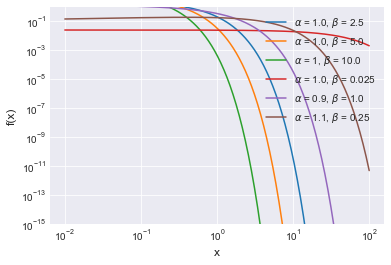

In [355]:
import numpy as np
import scipy.stats as st
plt.style.use('seaborn-darkgrid')
#x = np.linspace(0, 20, 200)
x = np.logspace(-2, 2.0, 200)
alphas = [1., 2., 3., 7.5]
betas = [.5, .5, 1., 1.]

a=1.0; b=2.50
pdf = st.gamma.pdf(x, a, scale=1.0/b)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))

a=1.0; b=5.0
pdf = st.gamma.pdf(x, a, scale=1.0/b)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
a=1; b=10.0
pdf = st.gamma.pdf(x, a, scale=1.0/b)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))


a=1.0; b=0.0250
pdf = st.gamma.pdf(x, a, scale=1.0/b)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))

a=0.9; b=1.0
pdf = st.gamma.pdf(x, a, scale=1.0/b)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
a=1.1; b=0.25
pdf = st.gamma.pdf(x, a, scale=1.0/b)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))

plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-15,1)

In [371]:
x = np.logspace(np.log10((2*np.pi)/(1800/86400)), np.log10((2*np.pi)/(4*80)), 500)
for lam in [0.025,0.1,0.0005]:
    pdf = st.expon.pdf(x, scale=1.0/lam)
    plt.plot(x, pdf, label=r'$\lambda$ = {}'.format(lam))
    
plt.plot([(2*np.pi)/(1800/86400),(2*np.pi)/(4*80)],[0.0010,0.0010],'o')
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)

plt.xscale('log')
#plt.yscale('log')



DEBUG [matplotlib.ticker.tick_values()]: vmin 0.012125798002082792 vmax 488.3606538420368
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.012125798002082792 vmax 488.3606538420368
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.012125798002082792 vmax 488.3606538420368
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e

DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.012125798002082792 vmax 488.3606538420368
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03,
       2.e+04, 3.e+04, 4.e+04, 5.e+04, 6.e+04, 7.e+04, 8.e+04, 9.e+04])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.012125798002082792 vmax 488.3606538420368
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-03, 1.e-02, 1.e-01

In [360]:
np.std(np.random.normal(1.0,0.01,1000))

0.010136579676748298

In [343]:
import numpy as np
import scipy.stats as st
plt.style.use('seaborn-darkgrid')
#x = np.linspace(0, 20, 200)
x = np.logspace(-4, 0.9, 200)
alphas = [1., 2., 3., 7.5]
betas = [.5, .5, 1., 1.]

a=0.05; b=1
pdf = st.invgamma.pdf(x, a, scale=1.0/b)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
a=0.01; b=10
pdf = st.invgamma.pdf(x, a, scale=1.0/b)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
a=0.0025; b=0.1
pdf = st.invgamma.pdf(x, a, scale=1.0/b)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))

plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,10)
plt.ylim(1e-20,1e2)

(1e-20, 100.0)

DEBUG [matplotlib.ticker.tick_values()]: vmin 0.01 vmax 10.0
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.01 vmax 10.0
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.01 vmax 10.0
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.01 vmax 10.0
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-03, 1.

DEBUG [matplotlib.ticker.tick_values()]: vmin 0.01 vmax 10.0
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.01 vmax 10.0
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.01 vmax 10.0
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03, 7.e-03, 8.e-03, 9.e-03,
       2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02])
DEBUG [matplotlib.ticker.tick_values()]: vmin 0.01 vmax 10.0
DEBUG [matplotlib.ticker.tick_values()]: ticklocs array([1.e-03, 1.

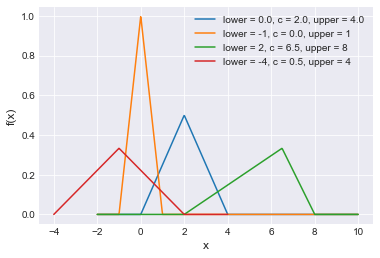

In [330]:
import scipy.stats as st
x = np.linspace(-2, 10, 500)
lowers = [0., -1, 2]
cs = [2., 0., 6.5]
uppers = [4., 1, 8]
for lower, c, upper in zip(lowers, cs, uppers):
    scale = upper - lower
    c_ = (c - lower) / scale
    pdf = st.triang.pdf(x, loc=lower, c=c_, scale=scale)
    plt.plot(x, pdf, label='lower = {}, c = {}, upper = {}'.format(lower,
                                                                   c,
                                                                   upper))
x = np.linspace(-4, 4, 300)
lower,c,upper=-4,0.5,4
pdf = st.triang.pdf(x, loc=lower, c=c, scale=scale)
plt.plot(x, pdf, label='lower = {}, c = {}, upper = {}'.format(lower,
                                                               c,
                                                               upper))

plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)


In [237]:
from stellar import *

def getStellarInfo(ID,hdr,mission,savedf=True):
    if mission[0]=='T' or mission[0]=='t':
        #Using TIC-8 as input cat for TESS stars
        best_stardf = Catalogs.query_criteria("Tic-8",
                                              SkyCoord(hdr['RA_OBJ'],row['DEC_OBJ'],unit=u.deg),
                                              radius=15/3600)
    elif mission[0]=='K' or mission[0]=='k':
        best_stardf=starpars(ID,mission,errboost=0.2,return_best=True,useGaiaLum=True,useGaiaBR=True,useGaiaSpec=True,
                             useBV=True,use2mass=True,useGriz=True,useGaiaAg=True)
        best_stardf['rho']=best_stardf['rho_gcm3']/1.4098
        best_stardf['rho']=best_stardf['rho_gcm3e']/1.4098
        best_stardf=best_stardf.rename(columns={'TBD':'TBD'})
        
    #Taking brightest star if multiple:
    if type(best_stardf)==pd.DataFrame and best_stardf.shape[1]>1:
        #Taking brightest star:
        if mission[0] in ['t','T']:
            best_stardf=beststardf.iloc[np.argmin(best_stardf.Tmag)]
        else:
            best_stardf=beststardf.iloc[np.argmin(best_stardf.kepmag)]
    elif best_stardf.shape[1]==1:
        #Pandas df -> Series
        best_stardf=best_stardf.iloc[0]
    
    #Sorting out missing data and getting important info - Mass, Radius, density and logg:
    if pd.isnull(dfrow[['logg','mass']]).all() and ~np.isnan(dfrow['lum']):
        #Mass-Luminosity relation for objects with no Mass but have Luminosity
        if ((~np.isnan(dfrow['rad']))&(dfrow['rad']<0.55))|((dfrow['Teff']<5000)&(dfrow['lum']<1.0)):
            #M < 0.43
            dfrow['mass']=np.power(dfrow['lum']/0.23,1/2.3)
            dfrow['e_mass']=(1/2.3)*np.power(dfrow['lum']/0.23,1/2.3-1.0)*dfrow['e_lum']
            dfrow['logg']=np.power(10,dfrow['mass']/dfrow['rad']**2)+4.43
        elif dfrow['Teff']>8550:
            #2Ms < M < 55Ms
            dfrow['mass']=np.power(dfrow['lum']/1.4,1/3.5)
            dfrow['e_mass']=(1/3.5)*np.power(dfrow['lum']/1.4,1/3.5-1.0)*dfrow['e_lum']
        else:
            #0.43 < M < 2
            dfrow['mass']=np.power(dfrow['lum'],1/4)
            dfrow['e_mass']=(1/4)*np.power(dfrow['lum']/0.23,(1/4-1.0))*dfrow['e_lum']
    if ~pd.isnull(dfrow['mass']):
        masses=np.array([dfrow['mass'], dfrow['e_mass'],dfrow['e_mass']])

    #Logg:
    if ~pd.isnull(dfrow['logg']):
        logg=np.array([dfrow['logg'], dfrow['e_logg'],dfrow['e_logg']])
    elif ~pd.isnull(dfrow[['mass','rad']]).any():
        logg=np.array([np.log10(dfrow['mass']/dfrow['rad']**2)+4.438,0.5,0.5])
    else:
        logg=np.array([4,1,1])

    if not pd.isnull(dfrow['rho']) and dfrow['rho']!=0.0:
        rhos=[dfrow['rho'],dfrow['e_rho'],dfrow['e_rho']]      
    else:
        rhos=namaste.dens2(*dfrow[['logg','e_logg','e_logg','rad','e_rad','e_rad','mass','e_mass','e_mass']])
    print(rhos)
    
    return Rstar, rhos, Teff, logg
        #'teff', 'teffep', 'teffem', 'logg', 'loggep', 'loggem', 'feh', 'fehep',
        #'fehem', 'rad', 'radep', 'radem', 'mass', 'massep', 'massem',
        #'rho_gcm3', 'rho_gcm3ep', 'rho_gcm3em', 'lum', 'lumep', 'lumem', 'avs',
        #'avsep', 'avsem', 'dis', 'disep', 'disem', 'source'
        return Rstar, rhostar, Teff, logg

In [242]:
np.log10(((c.G*1*u.Msun)/(1*u.Rsun**2)).to(u.cm/(u.s)**2).value)

4.438067627303133

In [246]:
(u.Msun/(np.pi*4/3*u.Rsun**3)).to(u.g/u.cm**3)

<Quantity 1.4098263 g / cm3>

In [247]:
import everest

INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 248847494.


<everest.Everest(248847494)>

In [256]:
st=everest.Everest(211901114,season=18)

INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 211901114.


array([ 519,  523, 1553, 2067, 2068, 1053,   33, 1057, 1533,  548,   51,
         52, 1081,  573, 2109, 2111, 2110, 1604, 1094,  584,  600,   93,
       1629,  609, 2161, 1138, 2170, 1149, 1661, 2177, 1154,  131,  644,
        645,  134,  646,  647,  137,  648,  649,  650,  651,  652,  653,
        654,  655,  656, 1171,  657,  658,  154,  155,  156,  669, 1178,
       2205,  678, 1703, 1705, 2219, 2220, 1155, 1212,  189, 1725,  710,
        711,  712, 2249, 1229,  720, 1746,  728, 2265, 1752, 1754, 1245,
       1251, 2182, 1674, 2281, 1267, 1270, 1273,  765, 2301, 1281, 2308,
       1797, 2313, 2314, 2315, 1811,  275, 1302,  793, 2332,  285, 1821,
       2340,  295,  299, 2348, 2350, 1843,  308, 1333, 1334, 1847, 1341,
        843, 1356, 1357, 1358, 2386,  345, 1372, 1373,  862,  861,  864,
        865,  863, 1376, 2397, 1893, 2404, 1897, 1390, 1392,  886,  887,
       1402,  381, 1917, 1926,  397,  921, 1437,  433,  435, 1973, 2489,
        957,  959,  960,  961,  477, 2013, 1511, 15

In [253]:
st.time

array([3156.44535484, 3156.4657875 , 3156.48622007, ..., 3244.40460467,
       3244.42503636, 3244.44546815])

In [ ]:
249234088

In [250]:
st.flux

array([181515.596964  , 181479.56331565, 181475.45334854, ...,
       181705.14397278, 181706.17168227, 181658.4781803 ])

In [97]:
listgaps

array([ 1.5  ,  1.75 ,  2.   ,  2.25 ,  2.5  ,  8.4  ,  8.605,  8.81 ,
        9.015,  9.22 ,  9.425,  9.63 ,  9.835, 10.04 , 10.245, 10.45 ,
       10.655, 10.86 , 11.065, 11.27 , 11.475, 11.68 , 11.885, 12.09 ,
       12.295, 12.5  , 18.4  , 18.625, 18.85 , 19.075, 19.3  , 25.4  ])

In [98]:
plt.plot(dist_from_t0,np.tile(1.0,len(dist_from_t0)),'.')
plt.xlim(1.2,3)

(1.2, 3)

In [85]:
gaps=np.hstack((np.diff(dist_from_t0)>(0.9*dur),True))
gaps)[0][0]

29

In [72]:
tf=fits.open("https://archive.stsci.edu/missions/tess/tid/s0003/0000/0000/6389/8957/tess2018263035959-s0003-0000000063898957-0123-s_lc.fits")

In [73]:
tf[1].data

FITS_rec([(1382.03968762, 0.00507748, 111297, 35545.9  , 21.053415, 2214.34  , 4.160939 , nan, nan, 128, nan, nan, nan, nan, 1017.56320565, 0.00046581, 273.72934369, 0.00046783, nan, nan),
          (1382.04107653, 0.0050775 , 111298, 35546.504, 21.05909 , 2223.8347, 4.1703978, nan, nan, 128, nan, nan, nan, nan, 1017.55763864, 0.00046599, 273.74040887, 0.00046752, nan, nan),
          (1382.04246543, 0.00507752, 111299, 35552.22 , 21.055212, 2213.667 , 4.1582694, nan, nan, 128, nan, nan, nan, nan, 1017.55894235, 0.00046562, 273.73646494, 0.00046787, nan, nan),
          ...,
          (1409.38517728, 0.00474051, 130986, 35782.04 , 24.147034, 9737.56  , 8.233795 , nan, nan, 128, nan, nan, nan, nan, 1017.49162929, 0.00054509, 273.83689481, 0.00054855, nan, nan),
          (1409.38656613, 0.00474047, 130987, 35830.055, 24.155172, 9732.525 , 8.230909 , nan, nan, 128, nan, nan, nan, nan, 1017.49313826, 0.00054387, 273.83028504, 0.00054766, nan, nan),
          (1409.38795498, 0.00474043, 13

In [17]:
type(lc[n])

astropy.io.fits.hdu.hdulist.HDUList

In [31]:
type(lc[n][0])

astropy.io.fits.hdu.image.PrimaryHDU

In [33]:
lc[n][0].header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2018-12-13'         / file creation date.                            
TSTART  =    1382.033915694891 / observation start time in TJD                  
TSTOP   =    1409.383908993930 / observation stop time in TJD                   
DATE-OBS= '2018-09-20T12:47: